# Bike Sharing Assignment

### Problem Statement:

Boom Bikes is a bike sharing system in which bikes are available for shared short term use for a fee.It suffered a dip in business due to the corona pandemic situation.
So the company wanted to understand the factors on which the demand depends.

Essentially the company wants to

- Identify the variables affecting the demand of the bikes
- To create a multi linear model that relates the 'cnt' variable with other variables such as holiday,working day,season,year etc.
- To know the accuracy of the model, i.e. how well these variables can predict bike demand.

### Business Goal:
With the help of the model built, the management can understand how each features affect the demand of shared bikes.<br>
Consecutively the busniness strategies can be modified to meet the demands levels and customer expectations.<br>
Furthurmore the model will be a better way for management to understand the demands of the post-corona market.

## Step 1: Reading and Understanding the Data

In [439]:
# supress warnings
import warnings
warnings.filterwarnings('ignore')

In [440]:
# import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [441]:
#to dispaly all columns of dataframe
pd.set_option('display.max_columns',None) 
#to dispaly all rows of dataframe
pd.set_option('display.max_rows',None)

In [442]:
# reading the data from the csv file 
bike_data=pd.read_csv('day.csv')

***Check the various aspects of the dataset***

In [443]:
# Checking the info of the dataset
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [444]:
# convert the date column 'dteday' to 'datetime'
bike_data['dteday']=pd.to_datetime(bike_data.dteday)

In [445]:
#Check the info to recheck the data type of 'dteday'
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [446]:
# check the summary statistics of numerical columns
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [447]:
# check the head of the dataset
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [448]:
# check the shape of dataset
bike_data.shape

(730, 16)

## Step 2: Data Cleaning and Preparation
#### Removing the unwanted columns:
- 'instant':  This is an index column and is not required in the model creation
- 'dteday':   Most of the components are already captured in the dataframe in the form of  'yr','mnth' etc,and hence this column can be dropped
- 'casual' and 'registered':  The sum of these variables are captured in 'cnt' variable and also these variables are directly propotional to 'cnt' variable.Moreover 'casual' and 'registered' are kind of a target variable and hence can be dropped.

In [449]:
# drop the unwanted columns 'instant','dteday','casual' and 'registered'
bike_data.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [450]:
# check the dataframe
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [451]:
#Checking for duplicates
bike_data.loc[bike_data.duplicated()]

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt


In [452]:
# checking the columns of the dataframe
bike_data.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

## Step 3 : Visualising the Data
Let us plot the variables to find:
- Any strong multicollinearity between the independent variables
- If any of the predictor variables have any direct association with the target variable

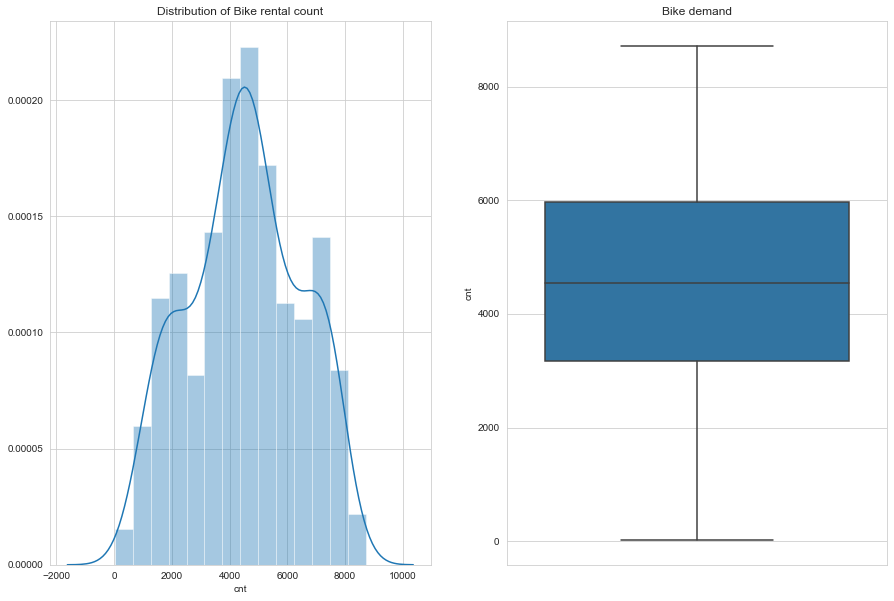

In [453]:
# Visualising the target variable 'cnt'
plt.figure(figsize=(15,10))
sns.set_style("whitegrid")

# Distribution plot of bike rental count
plt.subplot(1,2,1)
plt.title('Distribution of Bike rental count')
sns.distplot(bike_data.cnt)

# box plot of 'bike rental count'
plt.subplot(1,2,2)
plt.title('Bike demand')
sns.boxplot(y=bike_data.cnt)

plt.show()

***Inferences :***<br>
- The plot peaks at around 4000
- There are no presence of outliers in the 'cnt' variable.
- The median is slightly higher than 4000.

# Step 3.1 : Visualising Categorical Data

### Univariate Analysis

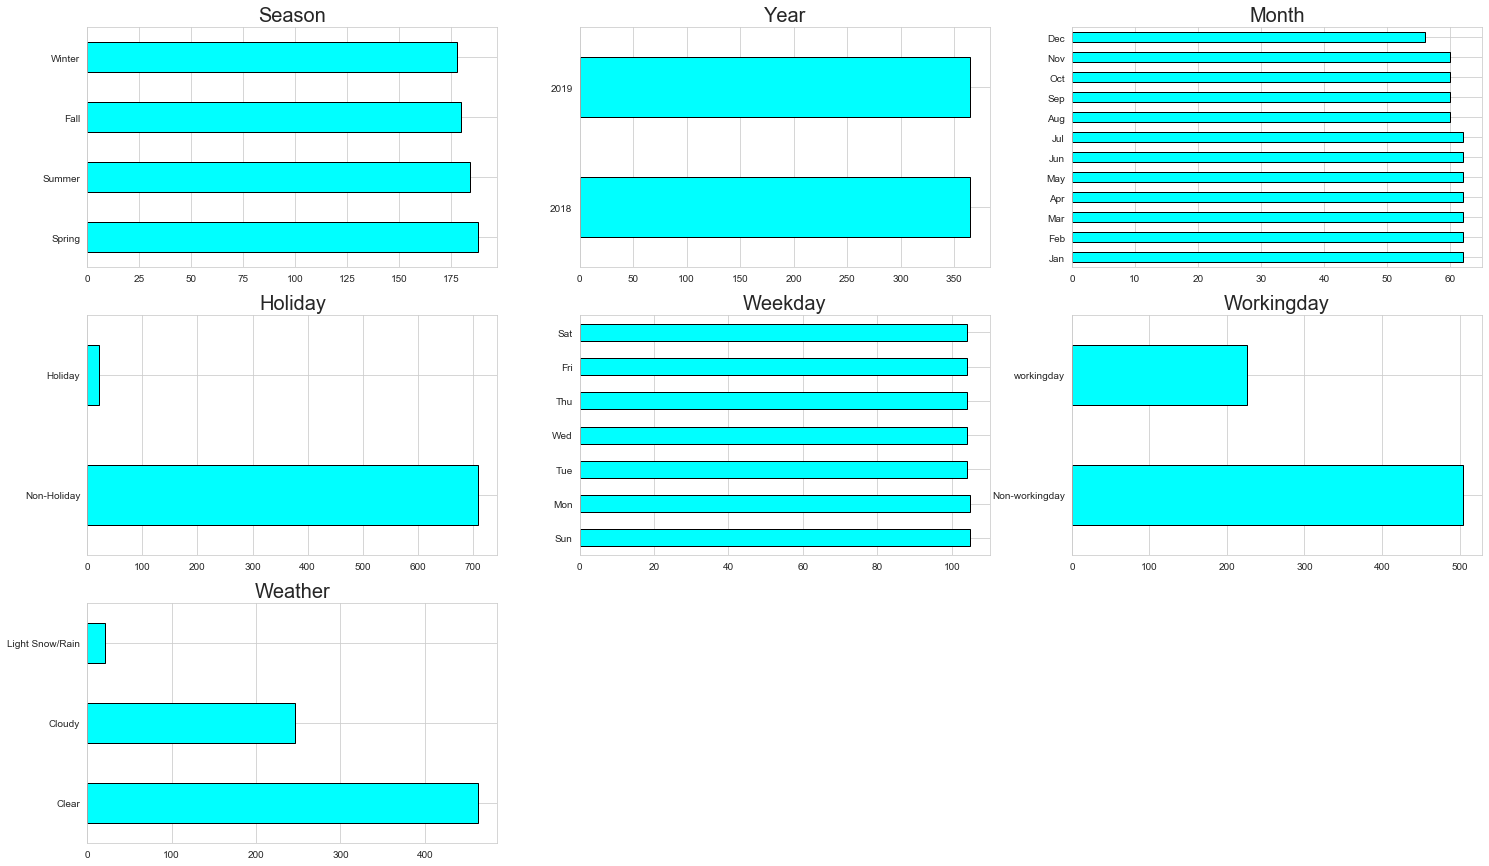

In [454]:
# Visualize the season,yr,mnth,holiday,weekday,workingday,weathersit variables
plt.figure(figsize=(25,15))

# plot for 'Season'
plt.subplot (3,3,1)
g=bike_data.season.value_counts().plot(kind='barh',color='cyan',edgecolor='black')
plt.title('Season',fontsize=20)
g.set(yticklabels=['Spring','Summer','Fall','Winter'])

# plot for 'year'
plt.subplot (3,3,2)
g=bike_data.yr.value_counts().plot(kind='barh',color='cyan',edgecolor='black')
plt.title('Year',fontsize=20)
g.set(yticklabels=['2018','2019'])

# plot for 'month'
plt.subplot (3,3,3)
g=bike_data.mnth.value_counts().plot(kind='barh',color='cyan',edgecolor='black')
plt.title('Month',fontsize=20)
g.set(yticklabels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

#plot for 'holiday'
plt.subplot (3,3,4)
g=bike_data.holiday.value_counts().plot(kind='barh',color='cyan',edgecolor='black')
plt.title('Holiday',fontsize=20)
g.set(yticklabels=['Non-Holiday','Holiday'])

#plot for 'weekday'
plt.subplot (3,3,5)
g=bike_data.weekday.value_counts().plot(kind='barh',color='cyan',edgecolor='black')
plt.title('Weekday',fontsize=20)
g.set(yticklabels=['Sun','Mon','Tue','Wed','Thu','Fri','Sat'])

#plot for 'workingday'
plt.subplot (3,3,6)
g=bike_data.workingday.value_counts().plot(kind='barh',color='cyan',edgecolor='black')
plt.title('Workingday',fontsize=20)
g.set(yticklabels=['Non-workingday','workingday'])

#plot for weather situation'
plt.subplot (3,3,7)
g=bike_data.weathersit.value_counts().plot(kind='barh',color='cyan',edgecolor='black')
plt.title('Weather',fontsize=20)
g.set(yticklabels=['Clear','Cloudy','Light Snow/Rain','Heavy Snow/Rain'])

plt.show()

### Bivariate Analysis

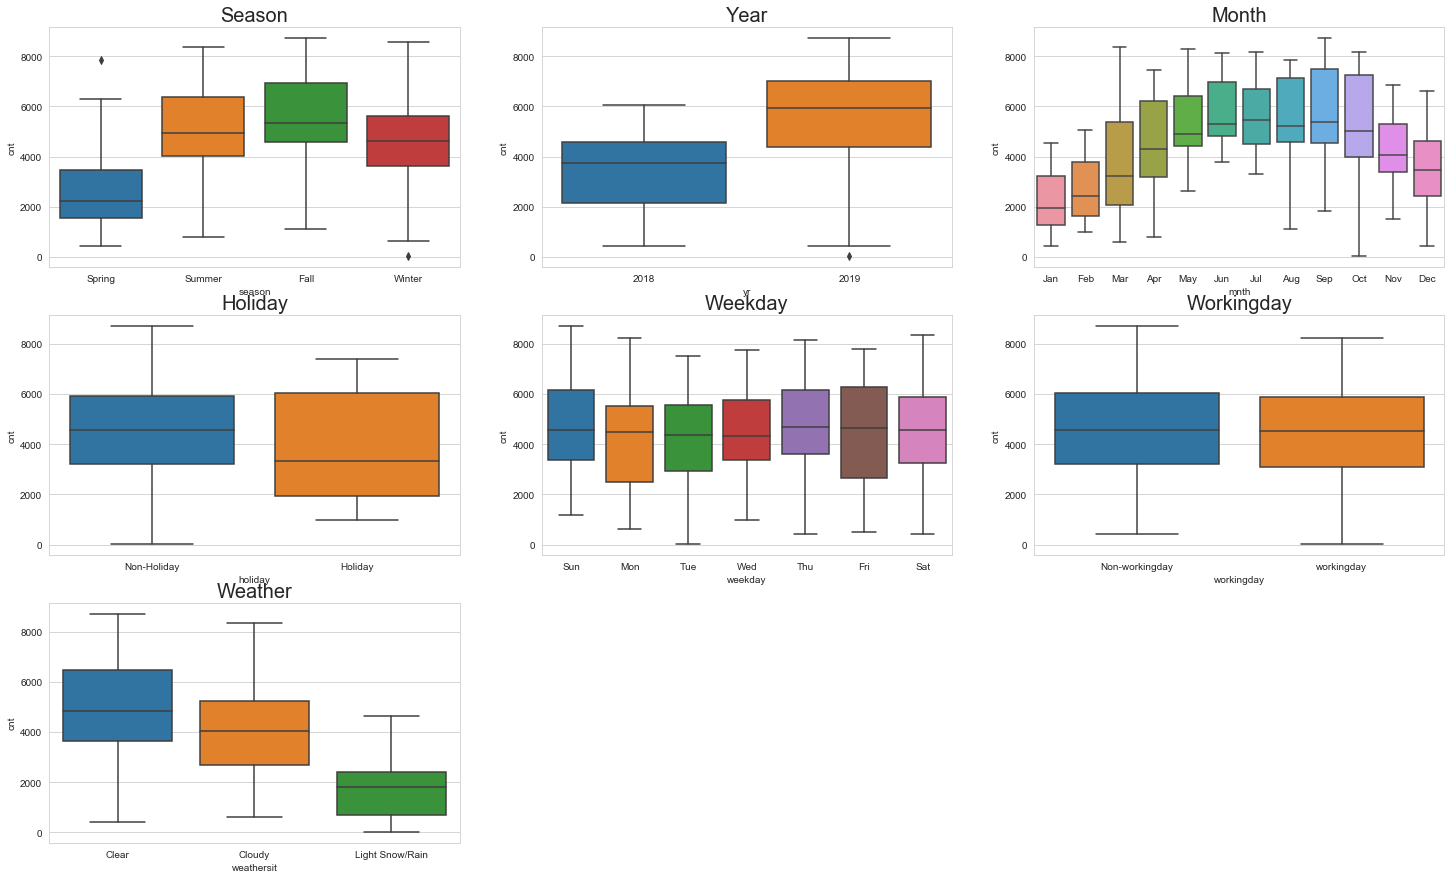

In [455]:
# Visualize the season,yr,mnth,holiday,weekday,workingday,weathersit variables
plt.figure(figsize=(25,15))


# plot for 'Season' vs 'cnt'
plt.subplot (3,3,1)
g=sns.boxplot(bike_data.season,bike_data.cnt)
plt.title('Season',fontsize=20)
g.set(xticklabels=['Spring','Summer','Fall','Winter'])

# plot for 'year' vs 'cnt'
plt.subplot (3,3,2)
g=sns.boxplot(bike_data.yr,bike_data.cnt)
plt.title('Year',fontsize=20)
g.set(xticklabels=['2018','2019'])

# plot for 'month' vs 'cnt'
plt.subplot (3,3,3)
g=sns.boxplot(bike_data.mnth,bike_data.cnt)
plt.title('Month',fontsize=20)
g.set(xticklabels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

#plot for 'holiday' vs 'cnt'
plt.subplot (3,3,4)
g=sns.boxplot(bike_data.holiday,bike_data.cnt)
plt.title('Holiday',fontsize=20)
g.set(xticklabels=['Non-Holiday','Holiday'])

#plot for 'weekday' vs 'cnt'
plt.subplot (3,3,5)
g=sns.boxplot(bike_data.weekday,bike_data.cnt)
plt.title('Weekday',fontsize=20)
g.set(xticklabels=['Sun','Mon','Tue','Wed','Thu','Fri','Sat'])

#plot for 'workingday' vs 'cnt'
plt.subplot (3,3,6)
g=sns.boxplot(bike_data.workingday,bike_data.cnt)
plt.title('Workingday',fontsize=20)
g.set(xticklabels=['Non-workingday','workingday'])


#plot for weather situation' vs 'cnt'
plt.subplot (3,3,7)
g=sns.boxplot(bike_data.weathersit,bike_data.cnt)
plt.title('Weather',fontsize=20)
g.set(xticklabels=['Clear','Cloudy','Light Snow/Rain','Heavy Snow/Rain'])

plt.show()

***Inferences :***<br>
1. 'Season' -> Fall has the highest median for ‘cnt’ followed by Summer and then winter. Outliers are present in spring and winter. The least ‘cnt’ is seen during Spring season. 

2. 'yr'-> For year 2019 'cnt' is higher when compared to year 2018.The popularity of bikes seems to have increased over the year. 

3. 'mnth' ->The 'cnt' is higher during the mid-time of year.The highest 'cnt’ is seen in July and the lowest in January. 

4. 'holiday' -> Non holiday days have higher median on ‘cnt’ than holidays.The demand for bike seems to be more during Non-holidays. 

5. 'weekday' -> All the plots have almost same median on ‘cnt’. The days of the week does not seem to have much effect on the demand of bikes. 

6. 'workingday' ->The median is almost same for both working and non-working day plots. 

7. 'weathersit' -> The 'cnt' is higher during clear weather followed by cloudy and then 'light snow/Rain'. 

# Step 3.2 : Visualising Continous variables

### Univariate Analysis

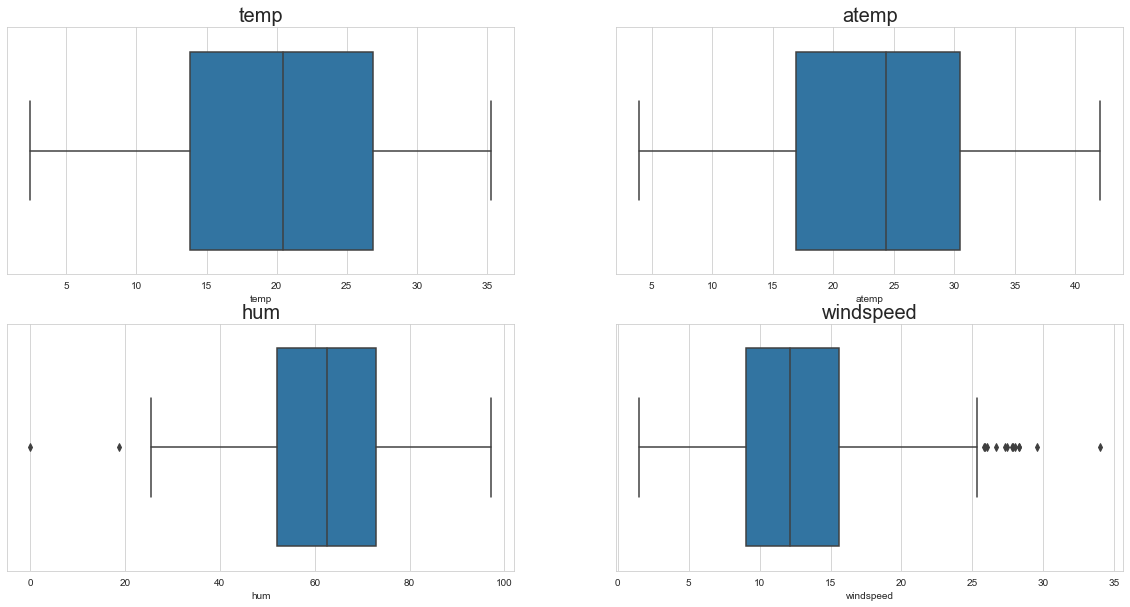

In [456]:
# plot all contionous variables
plt.figure(figsize=(20, 10))

# plot 'temp'
plt.subplot(2,2,1)
plt.title('temp',fontsize=20)
sns.boxplot(bike_data.temp)

# plot 'atemp'
plt.subplot(2,2,2)
plt.title('atemp',fontsize=20)
sns.boxplot(bike_data.atemp)

# plot 'hum'
plt.subplot(2,2,3)
plt.title('hum',fontsize=20)
sns.boxplot(bike_data.hum)

# plot 'windspeed'
plt.subplot(2,2,4)
plt.title('windspeed',fontsize=20)
sns.boxplot(bike_data.windspeed)

plt.show()

***Inferences :***<br>
1.  'atemp' has a slighlty higher median value when compared with 'temp' variable.
2.  There are few outliers in the 'hum' variable below the minimum value.
3.  There are few outliers in the 'windspeed' variable above the maximum value.

### Bivariate Analysis

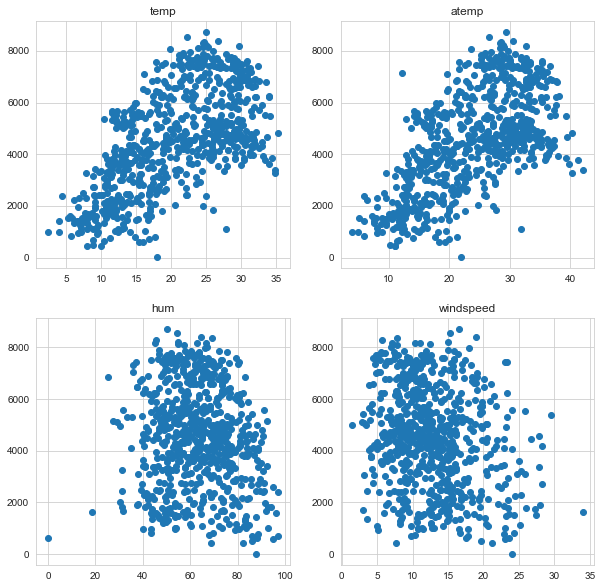

In [457]:
# plot all continous variables with 'cnt'
plt.figure(figsize=(10, 10))

# plot 'temp'
plt.subplot(2,2,1)
plt.title('temp')
plt.scatter(x ='temp', y = 'cnt', data = bike_data)

# plot 'temp'
plt.subplot(2,2,2)
plt.title('atemp')
plt.scatter(x ='atemp', y = 'cnt', data = bike_data)

# plot 'hum'
plt.subplot(2,2,3)
plt.title('hum')
plt.scatter(x ='hum', y = 'cnt', data = bike_data)

# plot 'windspeed'
plt.subplot(2,2,4)
plt.title('windspeed')
plt.scatter(x = 'windspeed', y = 'cnt', data = bike_data)

plt.show()

### Inferences :
1. 'temp' and 'atemp' seems to be postively correlated with 'cnt' variable
2. No Particular pattern is observed in 'hum' and 'windspeed' scatter plots

# Step 3.3 : Pair plot

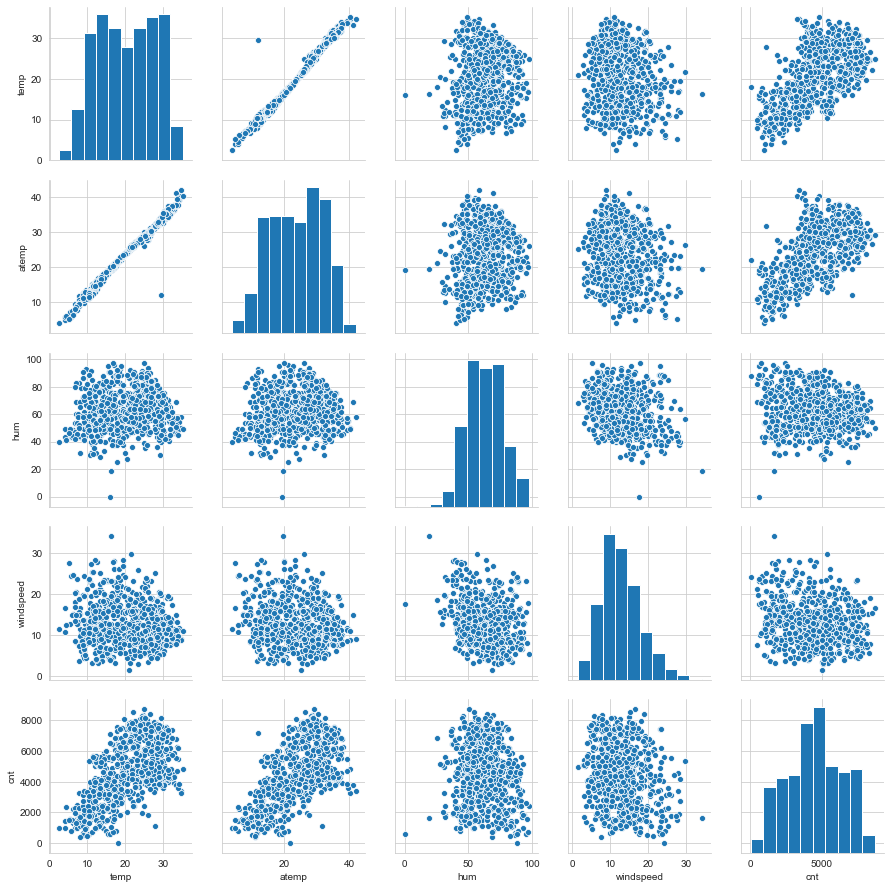

In [458]:
# Pair plot of categorical variables along with the target variable 'cnt'
num_var=bike_data[['temp','atemp','hum','windspeed','cnt']]   # num_var contains all the numeric variables.
sns.pairplot(num_var)
plt.show()

### Inferences :
1. There is a positive correlation between 'temp'and 'cnt' 
2. There is a positive correlation between 'atemp'and 'cnt' 
3. 'temp' and 'atemp' is highly correlated.

### Categorical variables

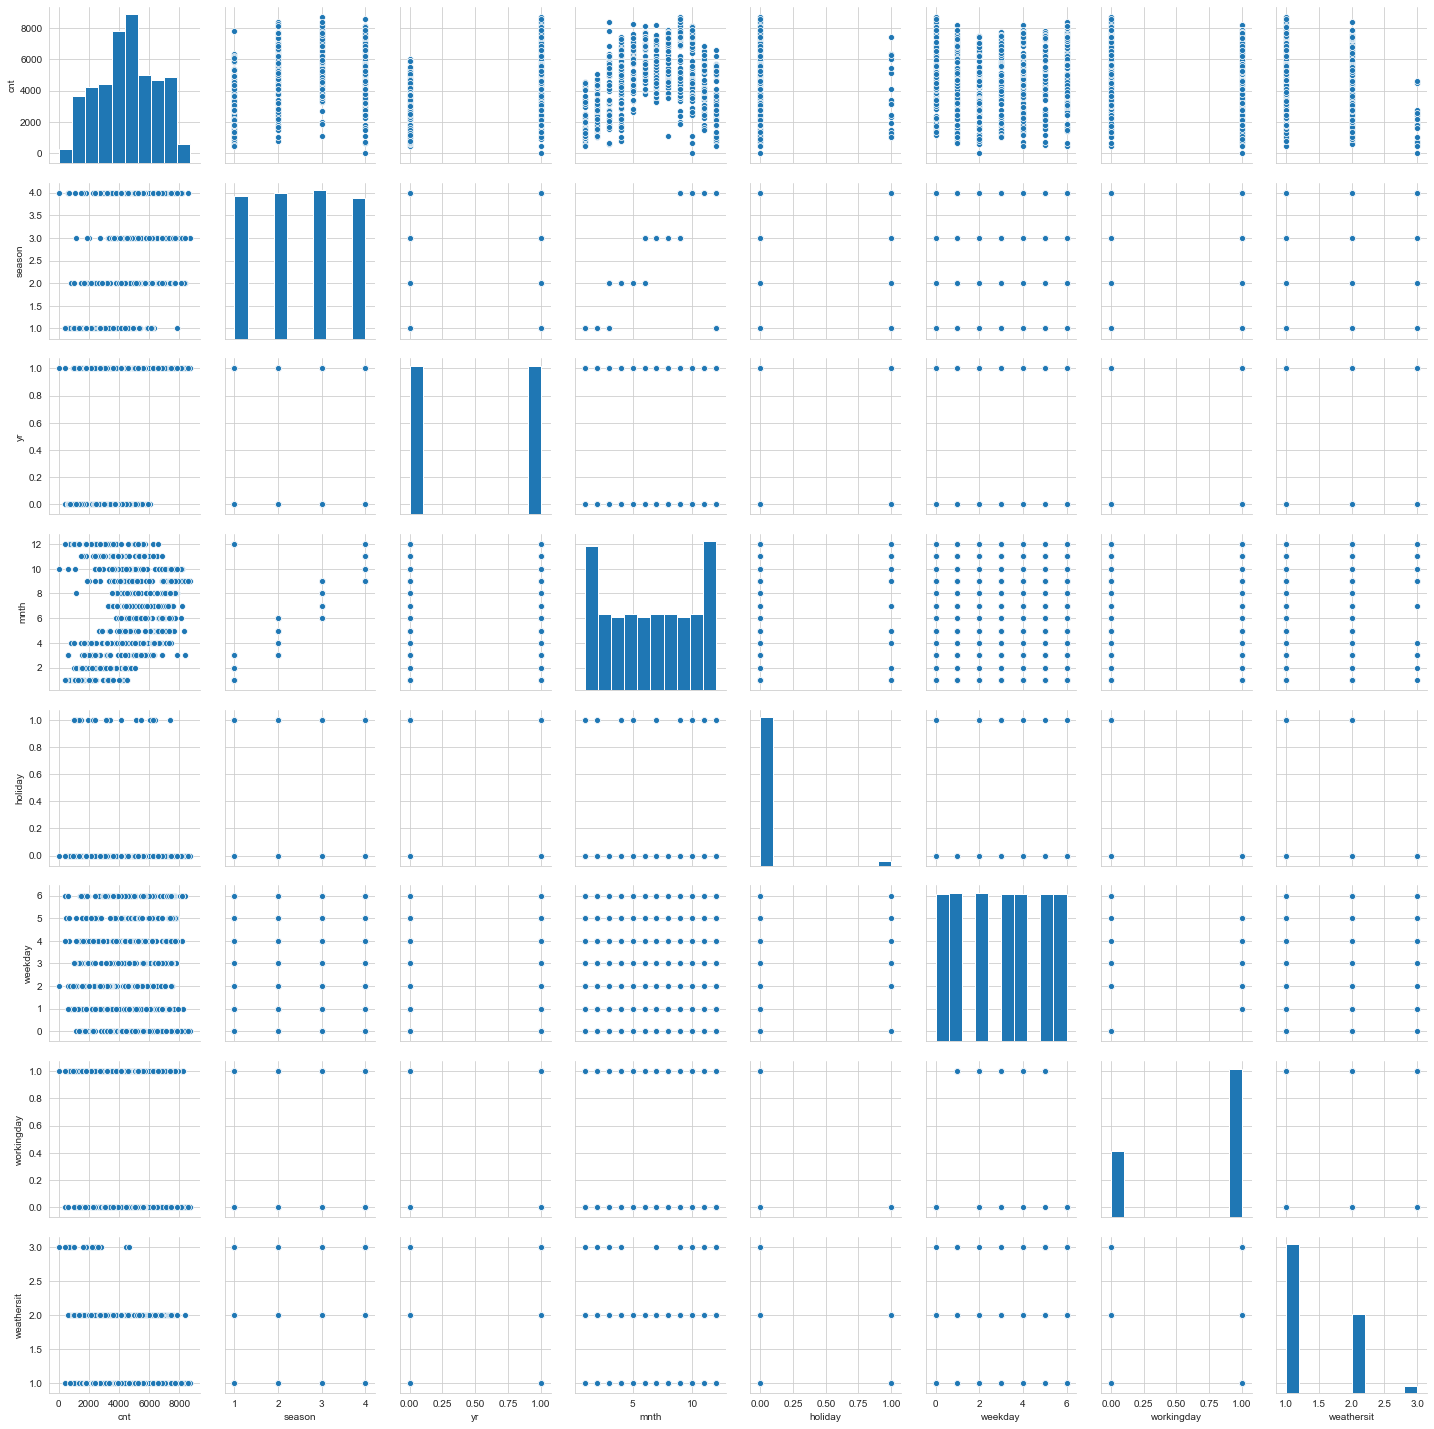

In [459]:
# pair plot of categorical variables along with the target variable 'cnt'
cate_var=bike_data[['cnt','season','yr','mnth','holiday','weekday','workingday','weathersit']]  # 'cate_var' contains the categorical variables.
sns.pairplot(cate_var)
plt.show()

# Step 3.4 : Heat Map

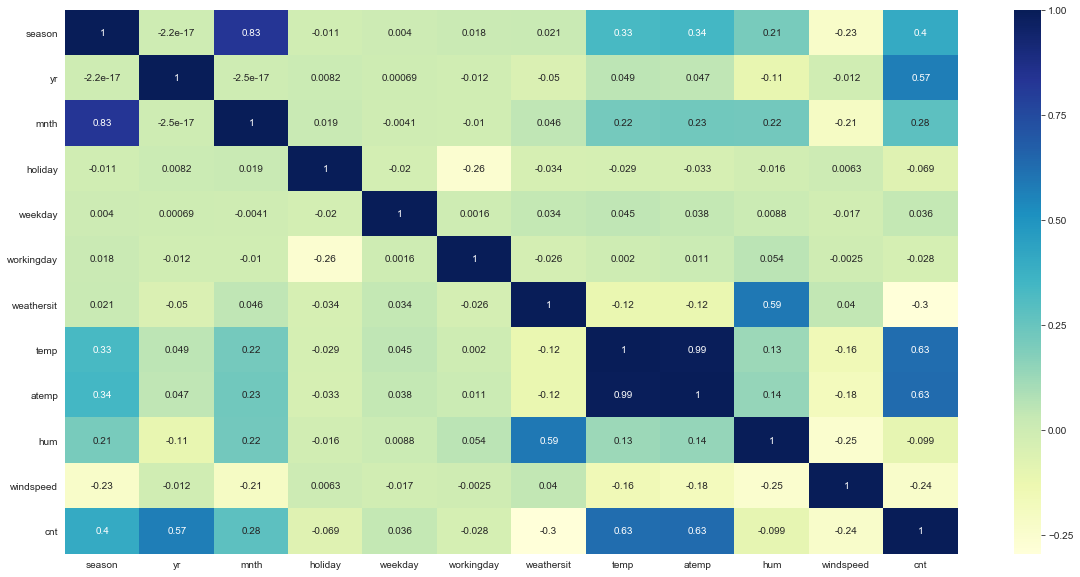

In [460]:
# correlation matrix of the variables in the dataset
fig, ax = plt.subplots(figsize=(20,10))        
sns.heatmap(bike_data.corr(),annot=True, cmap="YlGnBu")
plt.show()

***Inferences*** :<br>
1. The variables 'temp' and 'atemp' are highly correlated with a correlation coefficient as high as 0.99
2. The variables 'mnth' and 'season' also have a correlation coefficient of 0.83
3. With repect to the 'cnt' variable the variables 'temp' and 'atemp' have the highest coorelation coefficients with a value 0.63
4. The second most correlated variable with respect to the 'cnt' variable is 'yr'.

## Step 4: Data Preparation

### Step 4.1 : Drop variable with high correlation 

In [461]:
# variables 'temp' and 'atemp' are highly correlated with each other.'atemp' is the feeling temperature in Celsius.
# the presence of 'atemp'is redundant. Hence dropping 'atemp'.
bike_data.drop(['atemp'],axis=1,inplace=True)

In [462]:
#check the dataframe
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,43.6957,12.522300,1600


In [463]:
# check the shape of dataframe 
bike_data.shape

(730, 11)

### Step 4.2 : Create the dummy variables for the categorical variables 

In [464]:
# map the 'season' variables with the categorical values as given in the data dictionary
bike_data.season=bike_data.season.map({1:'spring',2:'summer',3:'fall',4:'winter'})
seasons = pd.get_dummies(bike_data['season'], drop_first = True) # saving the categorical values to the new variable and dropping the first variable
bike_data = pd.concat([bike_data,seasons], axis = 1) # adding the results to the bike_data dataframe
bike_data.drop(['season'], axis = 1, inplace = True)# dropping the 'season' variable
bike_data.head() # check the dataframe

,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter
0,0,1,0,1,1,2,14.110847,80.5833,10.749882,985,1,0,0
1,0,1,0,2,1,2,14.902598,69.6087,16.652113,801,1,0,0
2,0,1,0,3,1,1,8.050924,43.7273,16.636703,1349,1,0,0
3,0,1,0,4,1,1,8.200000,59.0435,10.739832,1562,1,0,0
4,0,1,0,5,1,1,9.305237,43.6957,12.522300,1600,1,0,0


In [465]:
# map the 'mnth' variables with the categorical values as given in the data dictionary
bike_data.mnth=bike_data.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
months = pd.get_dummies(bike_data['mnth'], drop_first = True) # saving the categorical values to the new variable and dropping the first variable
bike_data = pd.concat([bike_data,months], axis = 1) # adding the results to the bike_data dataframe
bike_data.drop(['mnth'], axis = 1, inplace = True)# dropping the original variable
bike_data.head() # check the dataframe

,yr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,1,1,2,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,2,1,2,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,3,1,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,4,1,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,5,1,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0


In [466]:
# map the 'weekday' variables with the categorical values  as given in the data dictionary
bike_data.weekday=bike_data.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
days = pd.get_dummies(bike_data['weekday'], drop_first = True) # saving the categorical values to the new variable and dropping the first variabl
bike_data = pd.concat([bike_data,days], axis = 1) # adding the results to the bike_data dataframe
bike_data.drop(['weekday'], axis = 1, inplace = True)# dropping the 'season' variable
bike_data.head() # check the dataframe

,yr,holiday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
0,0,0,1,2,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,1,2,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,1,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,1,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [467]:
# map the 'weathersit' variables with the categorical values as given in the data dictionary 
bike_data.weathersit=bike_data.weathersit.map({1:'clear',2:'cloudy',3:'light snow/rain',4:'heavy snow/rain'})
weather = pd.get_dummies(bike_data['weathersit'], drop_first = True) # saving the categorical values to the new variable and dropping the first variabl
bike_data = pd.concat([bike_data,weather], axis = 1) # adding the results to the bike_data dataframe
bike_data.drop(['weathersit'], axis = 1, inplace = True)# dropping the 'season' variable
bike_data.head() # check the dataframe

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,cloudy,light snow/rain
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [468]:
bike_data.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,cloudy,light snow/rain
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [469]:
# check the shape of the dataframe
bike_data.shape

(730, 29)

In [470]:
bike_data.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'spring', 'summer', 'winter', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun',
       'mar', 'may', 'nov', 'oct', 'sep', 'mon', 'sat', 'sun', 'thu', 'tue',
       'wed', 'cloudy', 'light snow/rain'],
      dtype='object')

## Step 5: Train-Test Split and feature scaling

In [471]:
#importing the libraries
from sklearn.model_selection import train_test_split

# We specify (random-state=100), so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(bike_data, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

Rescaling the features using MinMaxScaling

In [472]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [473]:
# Apply scaler() to the continous variables 
num_vars = ['temp', 'hum', 'windspeed','cnt']  # 'num_var' has the numerical variables

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,cloudy,light snow/rain
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
728,1,0,1,0.245101,0.498067,0.663106,0.204096,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


### Dividing into X and Y sets for the model building

In [474]:
# dividing the data into X and y sets
y_train = df_train.pop('cnt')
X_train = df_train

## Step 6 : Model Building 
### RFE
Recursive feature elimination

In [475]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [476]:
# Running RFE with the feature selection count  as 15
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [477]:
# list of the variables in the dataframe and their RFE ranking
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', False, 9),
 ('dec', True, 1),
 ('feb', False, 2),
 ('jan', True, 1),
 ('jul', True, 1),
 ('jun', False, 13),
 ('mar', False, 14),
 ('may', False, 6),
 ('nov', True, 1),
 ('oct', False, 11),
 ('sep', True, 1),
 ('mon', False, 8),
 ('sat', False, 4),
 ('sun', False, 5),
 ('thu', False, 12),
 ('tue', False, 7),
 ('wed', False, 10),
 ('cloudy', True, 1),
 ('light snow/rain', True, 1)]

In [478]:
# saving the RFE rank 1 variables to 'col'
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'dec', 'jan', 'jul', 'nov', 'sep', 'cloudy',
       'light snow/rain'],
      dtype='object')

In [479]:
# variables that have RFE ranking 2 and more
X_train.columns[~rfe.support_]

Index(['workingday', 'aug', 'feb', 'jun', 'mar', 'may', 'oct', 'mon', 'sat',
       'sun', 'thu', 'tue', 'wed'],
      dtype='object')

In [480]:
# import the variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

# defining a function for checking the VIF values
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

### Building model using statsmodel, for the detailed statistics
# MODEL 1

In [481]:
# creating X_train_1 using rfe selected variables
X_train_1=X_train[col]

In [482]:
# adding a constant variable
import statsmodels.api as sm
X_train_1=sm.add_constant(X_train_1)

In [483]:
# building a model
lm1=sm.OLS(y_train,X_train_1).fit()

In [484]:
# Fetching the coefficients and intercept
lm1.params

const              0.320243
yr                 0.230328
holiday           -0.091228
temp               0.479977
hum               -0.160227
windspeed         -0.188457
spring            -0.061737
summer             0.040767
winter             0.103435
dec               -0.037199
jan               -0.043748
jul               -0.055495
nov               -0.040949
sep                0.074891
cloudy            -0.055876
light snow/rain   -0.248116
dtype: float64

In [485]:
# check the summary of the model
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          3.34e-189
Time:                        21:57:09   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3202      0.036     

### Inference:<BR>
`Since the P values are all less than 0.05 let us look for multicollienarity using VIF.`

In [486]:
# check for multicollinearity using the pre defined function
checkVIF(X_train_1)

,Features,VIF
0,const,82.48
6,spring,5.27
3,temp,4.42
8,winter,3.83
7,summer,2.76
4,hum,1.93
12,nov,1.76
10,jan,1.68
14,cloudy,1.57
9,dec,1.49


### Inference:<BR>

`'spring' has VIF value greater than 5.Hence it needs to be dropped and rebuild the model.
R-squared and Adj. R-squared values are as follows:
R-squared:                       0.845
Adj. R-squared:                  0.841
Even though the model has decent R-squared and Adj. R-squared ,let us drop some features and see how the model behaves.`

# MODEL 2 
### Dropping the variable and rebuild the model

In [487]:
# 'spring' has a high VIF value which shows that there is multicollienarity between 'spring' and other predictor variables
# hence dropping the 'spring' feature and saving it to 'X_train_2'
X_train_2=X_train_1.drop('spring',axis=1)

In [488]:
# adding a constant variable 
X_train_2=sm.add_constant(X_train_2)

In [489]:
# building a model
lm2=sm.OLS(y_train,X_train_2).fit()

In [490]:
# check the summary
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          1.54e-188
Time:                        21:57:09   Log-Likelihood:                 510.40
No. Observations:                 510   AIC:                            -990.8
Df Residuals:                     495   BIC:                            -927.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2563      0.029     

### Inference:<BR>

`The P value of 'nov' is greater than 0.05. Hence 'nov' needs to be dropped and rebuild the model.`
`R-squared and Adj. R-squared values are as follows:
R-squared:                       0.843
Adj. R-squared:                  0.838
There is a drop in R-squared and  Adj. R-squared.`

# MODEL 3
### Dropping the variable and rebuild the model

In [491]:
# 'nov' has a P value greater than 0.05 ,which shows that the variable is insignificant and hence needs to be dropped.
#  dropping the 'nov' feature and saving it to 'X_train_3'
X_train_3=X_train_2.drop('nov',axis=1)

In [492]:
# adding a constant variable 
X_train_3=sm.add_constant(X_train_3)

In [493]:
# building a model
lm3=sm.OLS(y_train,X_train_3).fit()

In [494]:
# Fetching the coefficients and intercept
lm3.params

const              0.249846
yr                 0.228977
holiday           -0.099622
temp               0.562079
hum               -0.171750
windspeed         -0.196889
summer             0.072800
winter             0.127460
dec               -0.020087
jan               -0.043178
jul               -0.046402
sep                0.092688
cloudy            -0.052593
light snow/rain   -0.239156
dtype: float64

In [495]:
# check the summary
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.3
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          4.25e-189
Time:                        21:57:09   Log-Likelihood:                 508.96
No. Observations:                 510   AIC:                            -989.9
Df Residuals:                     496   BIC:                            -930.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2498      0.029     

### Inference:<BR>

`The P value of 'dec' is greater than 0.05.Hence 'dec' needs to be dropped and rebuild the model.`
`R-squared and Adj. R-squared values are as follows:
R-squared:                       0.842
Adj. R-squared:                  0.838
There is a drop in R-squared and Adj. R-squared remains the same.`

# MODEL 4
### Dropping the variable and rebuild the model

In [496]:
# 'dec' has a P value greater than 0.05 ,which shows that the variable is insignificant and hence needs to be dropped.
#dropping the 'dec' feature and saving it to 'X_train_4'
X_train_4=X_train_3.drop('dec',axis=1)

In [497]:
# adding a constant variable 
X_train_4=sm.add_constant(X_train_4)

In [498]:
# building a model
lm4=sm.OLS(y_train,X_train_4).fit()

In [499]:
# Fetching the coefficients and intercept
lm4.params

const              0.244357
yr                 0.228909
holiday           -0.098557
temp               0.571678
hum               -0.176354
windspeed         -0.194470
summer             0.074483
winter             0.125850
jan               -0.038021
jul               -0.047122
sep                0.094124
cloudy            -0.051863
light snow/rain   -0.236244
dtype: float64

In [500]:
# check the summary
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     219.8
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          6.03e-190
Time:                        21:57:09   Log-Likelihood:                 508.17
No. Observations:                 510   AIC:                            -990.3
Df Residuals:                     497   BIC:                            -935.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2444      0.028     

### Inference:<BR>

`The p value of all variables are less than 0.05 .Hence let us have a look at VIF.`

In [501]:
# check for multicollinearity
checkVIF(X_train_4)

,Features,VIF
0,const,49.60
3,temp,2.06
4,hum,1.88
8,jan,1.55
11,cloudy,1.55
7,winter,1.53
9,jul,1.43
6,summer,1.41
12,light snow/rain,1.24
5,windspeed,1.19


### Inference:<BR>

`Even though 'temp' have a VIF value greater than 2,dropping 'temp' is not ideal,since 'temp' is highly correlated with 'cnt'.
However since the P value of 'jan' is non-zero , dropping 'jan'.
R-squared and Adj. R-squared values are as follows:
R-squared:                       0.841
Adj. R-squared:                  0.838
There is a drop in R-squared and Adj. R-squared remains the same.`

# MODEL 5
### Dropping the variable and rebuild the model

In [502]:
#'jan' has the highest p value in the latest model.Hence dropping it to see how the model behaves and saving it to 'X_train_5'

X_train_5=X_train_4.drop('jan',axis=1)

In [503]:
# adding a constant variable 
X_train_5=sm.add_constant(X_train_5)

In [504]:
# building a model
lm5=sm.OLS(y_train,X_train_5).fit()

In [505]:
# Fetching the coefficients and intercept
lm5.params

const              0.225733
yr                 0.227942
holiday           -0.099419
temp               0.597751
hum               -0.182550
windspeed         -0.189202
summer             0.080346
winter             0.135725
jul               -0.048116
sep                0.095936
cloudy            -0.051698
light snow/rain   -0.233145
dtype: float64

In [506]:
# check the summary
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     237.6
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          3.89e-190
Time:                        21:57:09   Log-Likelihood:                 505.78
No. Observations:                 510   AIC:                            -987.6
Df Residuals:                     498   BIC:                            -936.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2257      0.027     

In [507]:
# check for multicollinearity
checkVIF(X_train_5)

,Features,VIF
0,const,44.99
4,hum,1.87
3,temp,1.60
10,cloudy,1.55
8,jul,1.43
6,summer,1.33
7,winter,1.29
11,light snow/rain,1.24
9,sep,1.19
5,windspeed,1.18


### Inference:<BR>

`The P value of 'jul' is non-zero, hence dropping 'jul'.`
`R-squared and Adj. R-squared values are as follows:
R-squared:                       0.840
Adj. R-squared:                  0.836
There is a drop in R-squared and Adj. R-squared has dipped slightly.`

# MODEL 6
### Dropping the variable and rebuild the model

In [508]:
# 'jul' has the highest p value.Hence dropping it to see how the model behaves ans saving it to X_train_6
X_train_6=X_train_5.drop('jul',axis=1)

In [509]:
# adding a constant variable 
X_train_6=sm.add_constant(X_train_6)

In [510]:
# building a model
lm6=sm.OLS(y_train,X_train_6).fit()

In [511]:
# Fetching the coefficients and intercept
lm6.params

const              0.225646
yr                 0.228914
holiday           -0.097964
temp               0.570606
hum               -0.173973
windspeed         -0.186706
summer             0.089525
winter             0.140200
sep                0.106731
cloudy            -0.051831
light snow/rain   -0.236675
dtype: float64

In [512]:
# check the summary
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     257.6
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          7.80e-190
Time:                        21:57:09   Log-Likelihood:                 502.18
No. Observations:                 510   AIC:                            -982.4
Df Residuals:                     499   BIC:                            -935.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2256      0.027     

In [513]:
# check for multicollinearity
checkVIF(X_train_6)

,Features,VIF
0,const,44.99
4,hum,1.86
9,cloudy,1.55
3,temp,1.27
7,winter,1.25
10,light snow/rain,1.23
6,summer,1.19
5,windspeed,1.18
8,sep,1.11
1,yr,1.03


### Inference:<BR>
- All the variables in model 6 are significant as evident from the p values.
- The VIF of the variables are in the acceptable range(less than 2).
- The R-squared is 83.8%.
- The Adj. R-squared is 83.4 %.
- There is a drop in R-squared and Adj. R-squared has dipped slightly.Still the model has a decent R squared and adj R-squared values.
- There is not much difference between R-squared and adjusted R-squared which shows that none of the variables are redundant.
- The Prob (F-statistic) is 7.80e-190 which is close to Zero.

## Step 7 : Model Building Residual Analysis of the train data <br>



Now let us look at the error terms and see if the error terms are normally distributed.
Let us plot a histogram of the error terms.

In [514]:
# predicting the Y values using the linear regression model
y_train_cnt=lm6.predict(X_train_6)

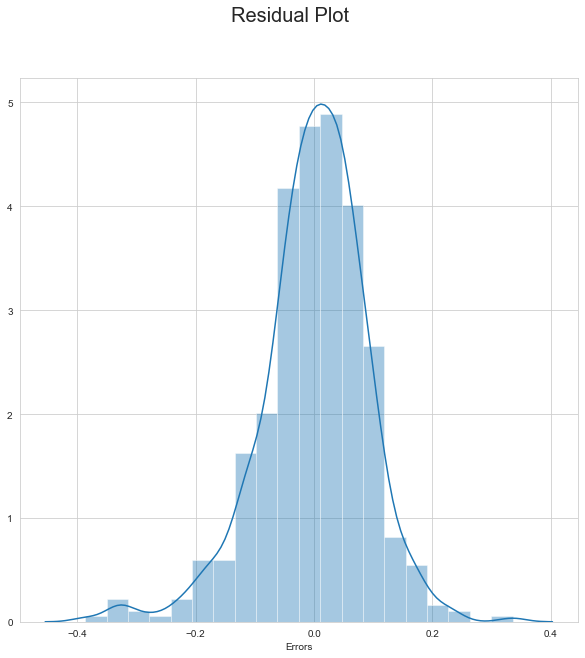

In [515]:
# plot a histogram for the error terms
fig = plt.figure(figsize=(10,10))
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Residual Plot', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 10)                          # X-label
plt.show()

### Inferences :
The error terms are normally distributed with mean 0.

## Step 8: Making Predictions Using the Final Model

#### Step 8.1 :Scaling of contionous features as done in train data

In [516]:
# Apply Scaling on test data sets continous variables
num_vars = ['temp', 'hum', 'windspeed','cnt']     # num_vars contain the numerical variables

df_test[num_vars] = scaler.transform(df_test[num_vars])  # since we have already fit the modelfor train data ,we just need to transform the test data

df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,cloudy,light snow/rain
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.837699,0.334206,0.303382,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.314298,0.537414,0.569029,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


#### step 8. 2 :Dividing into X_test and y_test

In [517]:
y_test = df_test.pop('cnt')
X_test = df_test

In [518]:
# Using model 6 to make predictions on test data set
# check the columns of X_train_6 dataframe
X_train_6.columns

Index(['const', 'yr', 'holiday', 'temp', 'hum', 'windspeed', 'summer',
       'winter', 'sep', 'cloudy', 'light snow/rain'],
      dtype='object')

In [519]:
# dropping constant from X_train_6
X_train_6=X_train_6.drop('const',axis=1)
# check the columns
X_train_6.columns

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'summer', 'winter', 'sep',
       'cloudy', 'light snow/rain'],
      dtype='object')

In [520]:
# create X_test_new dataframe with the variables in X_train_6 dataframe
X_test_new=X_test[X_train_6.columns]

In [521]:
# Adding a constant variable
X_test_new=sm.add_constant(X_test_new)

In [522]:
# making predictions
y_pred=lm6.predict(X_test_new)

## Step 9: Evaluvating the final model

### Step 9.1: Checking the R-squared score on test data

In [523]:
# Evaluation of model compairing y_test and y_pred and computing the R-squared
from sklearn.metrics import r2_score 
r_squared=r2_score(y_test, y_pred)
r_squared

0.8046410496371389

In [524]:
# Evaluvating the model using Adjusted R -squared value
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test_new.shape[1]-1)
adjusted_r_squared

0.7942596561395956

### Step 9. 2: Verifying  the assumptions of linear regression model 
Multiple linear regression analysis makes several key assumptions :
- There is a linear relationship between X and Y
- Error terms are normally distributed with mean zero
- No Multicollinearity
- Error terms have constant variance (homoscedasticity)

#### 1. There is a linear relationship between X and Y

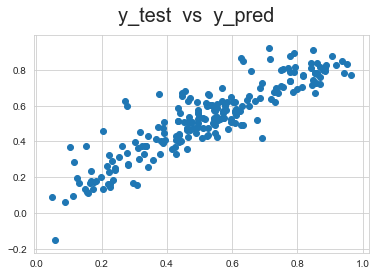

In [525]:
# verify linear relationship between X and y
# since there are many variable scatter plots are tedious ,so a better way to check linearity is to plot actual vs predicted value.
# plot a scatter plot to understand the spread of y_test and y_pred
fig=plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test  vs  y_pred',fontsize=20)
plt.show()

### Inferences :
The points are distributed around a diagonal line which shows the linear relationship of variables.

#### 2. Error terms are normally distributed with mean zero

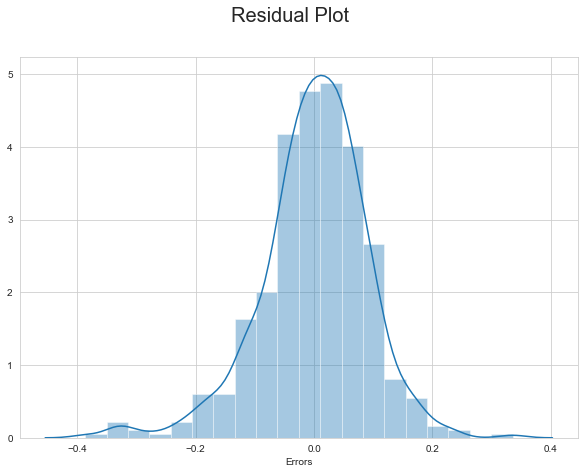

In [526]:
# plot a histogram for the error terms
fig = plt.figure(figsize=(10,7))
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Residual Plot', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 10)                          # X-label
plt.show()

### Inferences :
The error terms are normally distributed with mean 0.

#### 3. No Multicollinearity

In [527]:
# Adding a constant variable
X_train_6=sm.add_constant(X_train_6)

In [528]:
# check for multicollinearity
checkVIF(X_train_6)

,Features,VIF
0,const,44.99
4,hum,1.86
9,cloudy,1.55
3,temp,1.27
7,winter,1.25
10,light snow/rain,1.23
6,summer,1.19
5,windspeed,1.18
8,sep,1.11
1,yr,1.03


In [529]:
# check the shape of X_train_6
X_train_6.shape

(510, 11)

In [530]:
#converting y_train_cnt to a dataframe
y_new=y_train_cnt.to_frame()
y_new.shape # check the shape

(510, 1)

In [531]:
#concate X_train and y_new
bike_data_final=pd.concat((X_train_6,y_new),axis=1)
bike_data_final.head()

,const,yr,holiday,temp,hum,windspeed,summer,winter,sep,cloudy,light snow/rain,0
653,1.0,1,0,0.509887,0.575354,0.300794,0,1,0,0,0,0.729449
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,0.744041
426,1.0,1,0,0.442393,0.640189,0.255342,0,0,0,1,0,0.496112
728,1.0,1,0,0.245101,0.498067,0.663106,0,0,0,0,0,0.383960
482,1.0,1,0,0.395666,0.504508,0.188475,1,0,0,1,0,0.595064


In [532]:
# renaming the last column
bike_data_final.rename({0:'cnt'},axis=1,inplace=True)

In [533]:
# dropping the constant
bike_data_final=bike_data_final.drop('const',axis=1)

In [534]:
bike_data_final.head()

,yr,holiday,temp,hum,windspeed,summer,winter,sep,cloudy,light snow/rain,cnt
653,1,0,0.509887,0.575354,0.300794,0,1,0,0,0,0.729449
576,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,0.744041
426,1,0,0.442393,0.640189,0.255342,0,0,0,1,0,0.496112
728,1,0,0.245101,0.498067,0.663106,0,0,0,0,0,0.383960
482,1,0,0.395666,0.504508,0.188475,1,0,0,1,0,0.595064


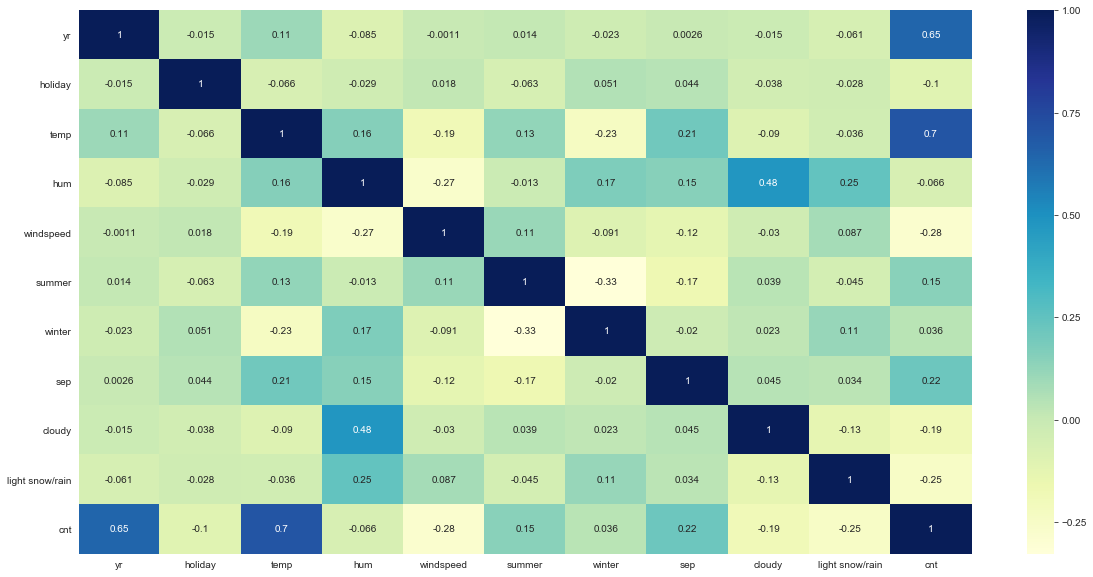

In [535]:
# correlation matrix of the variables in the final model
fig, ax = plt.subplots(figsize=(20,10))        
sns.heatmap(bike_data_final.corr(),annot=True, cmap="YlGnBu")
plt.show()

### Inferences :
- All the VIF values of the variables are within the acceptable range of <2.
- 'temp' has the highest correlation followed by 'yr' w.r.t the 'cnt' variable.
- 'light snow/rain' has the highest negative correlation with the 'cnt' variable.

#### 4. Error terms have constant variance (homoscedasticity)

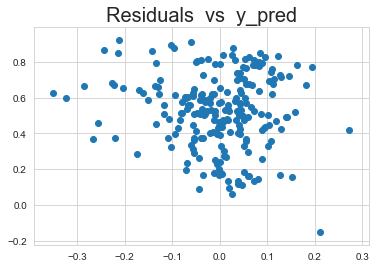

In [536]:
# Check the error terms are independent 
# look for patterns in the error terms( we should not be able to identify any pattern)
res=(y_test - y_pred)    # calculate res
plt.scatter(res,y_pred)  # plot res and y_pred
plt.title('Residuals  vs  y_pred',fontsize=20)
plt.show()

### Inferences :
From the plot we can infer there is no particular pattern and hence the residuals have constant variance .

## Step 10: Final Model Report 

The equation of the best fitted line is as follows <br>

$cnt=0.226  +  0.229 \times yr  +  0.571 \times temp  +  0.089 \times summer  +  0.140 \times  winter  +  0.106 \times sep  -  0.098 \times holiday  -  0.174 \times  hum  -  0.187 \times windspeed  - 0.052 \times cloudy - 0.236 \times light snow/rain$

In [537]:
# check the coefficents with .params and assigning it to a variable x
lm6.params
lm6.params.sort_values(ascending=False) # sorting the coefficients in desecnding order

temp               0.570606
yr                 0.228914
const              0.225646
winter             0.140200
sep                0.106731
summer             0.089525
cloudy            -0.051831
holiday           -0.097964
hum               -0.173973
windspeed         -0.186706
light snow/rain   -0.236675
dtype: float64

In [538]:
# check the summary
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     257.6
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          7.80e-190
Time:                        21:57:13   Log-Likelihood:                 502.18
No. Observations:                 510   AIC:                            -982.4
Df Residuals:                     499   BIC:                            -935.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2256      0.027     

### OLS Regression Results:<BR>
- All the variables in model 6 are significant as evident from the p values.
    Hence the association is not purely by chance.
- The VIF of the variables are in the acceptable range.In the final model there are no variables which are highly      correlated with each other.
- The R-squared is 83.8%. 
    That means 83.8% of variance in the 'cnt' is explained by the variables present in the model.
- The Adj. R-squared is 83.4 %.
- There is not much difference between R-squared and adjusted R-sqaured which shows that none of the variables are redundant.
- The Prob (F-statistic) is 7.80e-190 which is close to Zero.
    The model fit is statistically significant and the explained variance is not purely by chance.

### Top 10 features that define the target variable 

***The top 10 variables that are significant in predicting the demand for shared bikes  are***
1. temp
2. yr
3. winter
4. sep
5. summer
6. light snow/rain
7. windspeed
8. hum
9. holiday
10. cloudy

***The following variables are directly propotional to the 'cnt' variable***
1. temp
2. yr
3. winter
4. sep
5. summer

***The folowing variables are inversely propotional to the 'cnt' variable***
1. light snow/rain
2. windspeed
3. hum
4. holiday
5. cloudy

### Conclusions :

- The demand for bikes seems to increase during warmer days.
- Over the span of two years the bike demand seems to have significantly increased.
- Demand gets a dip during snowy days.
- The windspeed and humidity also seems to affect the demand of bike rental inversely.
- The demand for bike seems to be more during Non-holidays.
- Rental is generally less on cloudy days.

## Submitted By :

Sumitha T